## Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./new_data.csv')
df.head()

,Unnamed: 0,Item_Identifier,Item_Weight,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type
0,0,FDA15,9.30,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,1,DRC01,5.92,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,2,FDN15,17.50,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,3,FDX07,19.20,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800,Food
4,4,NCD19,8.93,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable


## Exploratory Data Analysis

#### 1.Dropping Unwanted Columns

In [3]:
y = df['Item_Outlet_Sales']

In [4]:
df.drop(columns = ['Item_Outlet_Sales','Unnamed: 0','Item_Identifier','Outlet_Type'], inplace = True)

### 2.Checking the Dimensions

In [5]:
df.shape

(8523, 6)

In [6]:
df.isna().sum()

Item_Weight                     0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
New_Item_Type                   0
dtype: int64

In [7]:
df1 = df.dropna()

In [8]:
df1.isna().sum()

Item_Weight                  0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
New_Item_Type                0
dtype: int64

In [9]:
df1.head()

,Item_Weight,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,New_Item_Type
0,9.300,249.8092,1999,Medium,Tier 1,Food
1,5.920,48.2692,2009,Medium,Tier 3,Drinks
2,17.500,141.6180,1999,Medium,Tier 1,Food
4,8.930,53.8614,1987,High,Tier 3,Non-Consumable
5,10.395,51.4008,2009,Medium,Tier 3,Food


### Visualisation

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

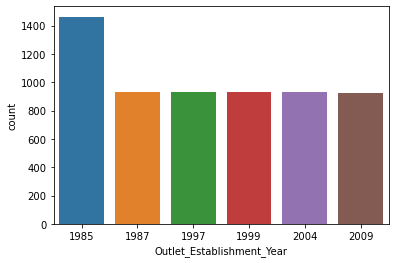

In [10]:
sns.countplot(df1["Outlet_Establishment_Year"])

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='New_Item_Type', ylabel='count'>

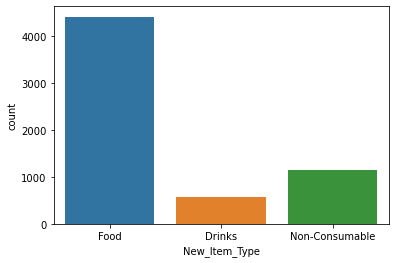

In [11]:
sns.countplot(df1["New_Item_Type"])

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

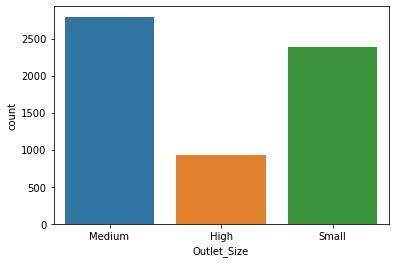

In [12]:
sns.countplot(df1["Outlet_Size"])

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

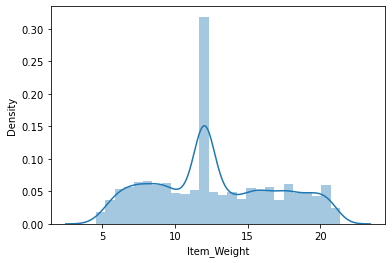

In [13]:
sns.distplot(df['Item_Weight'])

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

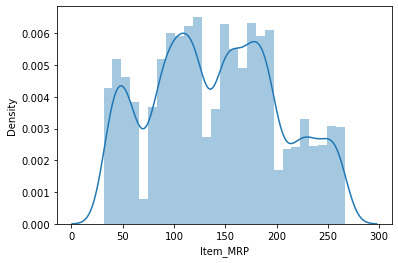

In [14]:
sns.distplot(df['Item_MRP'])

### Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cat_col = [ 'Outlet_Size', 'Outlet_Location_Type', 'New_Item_Type']
for col in cat_col:
    df[col] = le.fit_transform(df[col])

In [16]:
df

,Item_Weight,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,New_Item_Type
0,9.300,249.8092,1999,1,0,1
1,5.920,48.2692,2009,1,2,0
2,17.500,141.6180,1999,1,0,1
3,19.200,182.0950,1998,3,2,1
4,8.930,53.8614,1987,0,2,2
...,...,...,...,...,...,...
8518,6.865,214.5218,1987,0,2,1
8519,8.380,108.1570,2002,3,1,1
8520,10.600,85.1224,2004,2,1,2
8521,7.210,103.1332,2009,1,2,1


### Modeling

In [17]:
X = df.copy()

In [18]:
X.shape

(8523, 6)

In [19]:
y.shape

(8523,)

In [20]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression()

In [21]:
reg.predict([[9.30, 250.00, 1999,1,0,1]])

array([4026.71725436])

In [22]:
-4.16961635 * 9.3 +   15.54940126 * 250.00 +    7.05149149 * 1999 + -302.49371706 * 1 + 87.04202858 * 0 +  -22.33302489 * 1 + -13592.96

4026.7176295050012

### Testing on a Dataset

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [25]:
X_test.head()

,Item_Weight,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,New_Item_Type
1070,13.50,37.0874,2002,3,1,2
6305,12.50,87.9198,2009,1,2,1
8504,12.00,111.7544,1985,1,2,2
5562,12.50,87.1198,1997,2,0,1
1410,15.85,40.8480,1987,0,2,1


In [31]:
X_test.columns

Index(['Item_Weight', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'New_Item_Type'],
      dtype='object')

In [33]:
X_test['Predicted_values'] = reg.predict(X_test[['Item_Weight', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'New_Item_Type']])

<ipython-input-33-5b68dfc2d381>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Predicted_values'] = reg.predict(X_test[['Item_Weight', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',


In [34]:
X_test

,Item_Weight,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,New_Item_Type,Predicted_values
1070,13.500,37.0874,2002,3,1,2,179.417459
6305,12.500,87.9198,2009,1,2,1,1737.723388
8504,12.000,111.7544,1985,1,2,2,1918.853135
5562,12.500,87.1198,1997,2,0,1,1164.088195
1410,15.850,40.8480,1987,0,2,1,1139.177772
...,...,...,...,...,...,...,...
376,7.575,195.2768,1997,2,0,1,2866.400148
7708,12.600,255.9356,2009,1,2,1,4349.851519
3812,9.600,164.9184,1987,0,2,2,3072.125283
3928,12.000,52.7324,1985,1,2,1,1023.429399
